In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import textwrap

mpl.style.use('toby')

## Get data

In [140]:
group_df = pd.read_csv('../data/all_data_long.csv')
group_df_wide = pd.read_csv('../data/all_data_wide.csv')

### Select only T1 data

In [141]:
group_df_follow_up = group_df.copy()
group_df_follow_up = group_df_follow_up[group_df_follow_up['subjectID'].isin(group_df_follow_up.loc[group_df_follow_up['phase'] == 'T2', 'subjectID'])]
group_df = group_df[group_df['phase'] == 'T1']

## Risk perception

### Select data for risk perception questions

In [71]:
risk_perception_df = group_df[group_df['q_category'] == 'Risk perception'][['qid', 'prompt', 'response', 'subjectID', 'date']]
risk_perception_df['response'] = risk_perception_df['response'].astype(float)

### Plot some histograms

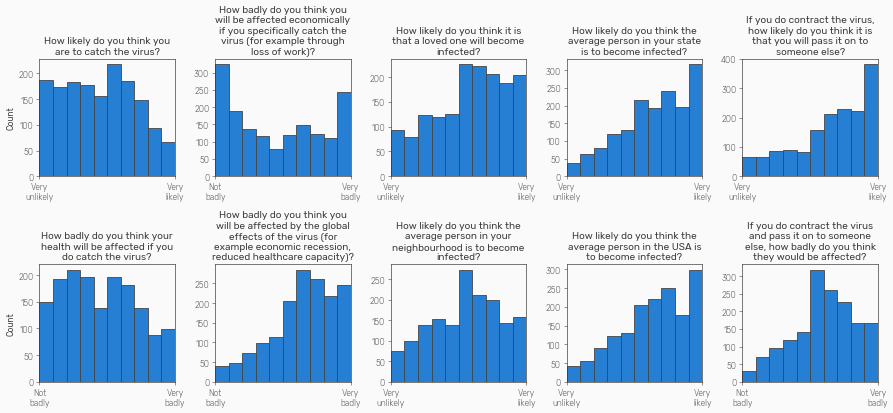

In [34]:
risk_perception_qs = risk_perception_df['prompt'].unique()

nrows = 2

f, ax = plt.subplots(nrows, np.ceil(len(risk_perception_qs) / nrows).astype(int), figsize=(15, 7), dpi=60)

for n, q in enumerate(risk_perception_qs):

    n_responses = len(risk_perception_df[risk_perception_df['prompt'] == q]['response'])
    ax[n % nrows, int(n / nrows)].hist(risk_perception_df[risk_perception_df['prompt'] == q]['response'], color='#267fd3', linewidth=1, edgecolor='#454545')
#     sns.kdeplot(risk_perception_df[risk_perception_df['prompt'] == q]['response'], ax=ax[n % nrows, int(n / nrows)], color='#267fd3', linewidth=1, shade=True, legend=False)
    
    
    ax[n % nrows, int(n / nrows)].set_xlim(0, 100)
#     ax[n % nrows, int(n / nrows)].set_title('Question {0}, n={1}\n'.format(n+1, n_responses) + '\n'.join(textwrap.wrap(q, 30, break_long_words=False)))
    ax[n % nrows, int(n / nrows)].set_title('\n'.join(textwrap.wrap(q, 30, break_long_words=False)))
    
    ax[n % nrows, int(n / nrows)].set_xticks([0, 100])
    if 'badly' in q:
        ax[n % nrows, int(n / nrows)].set_xticklabels(['Not\nbadly', 'Very\nbadly'])
    else:
        ax[n % nrows, int(n / nrows)].set_xticklabels(['Very\nunlikely', 'Very\nlikely'])
    
    if int(n / nrows) == 0:
        ax[n % nrows, int(n / nrows)].set_ylabel('Count')
    

plt.tight_layout()

plt.savefig('../figures/risk_question_distributions.png', dpi=200)
plt.savefig('../figures/risk_question_distributions.svg')

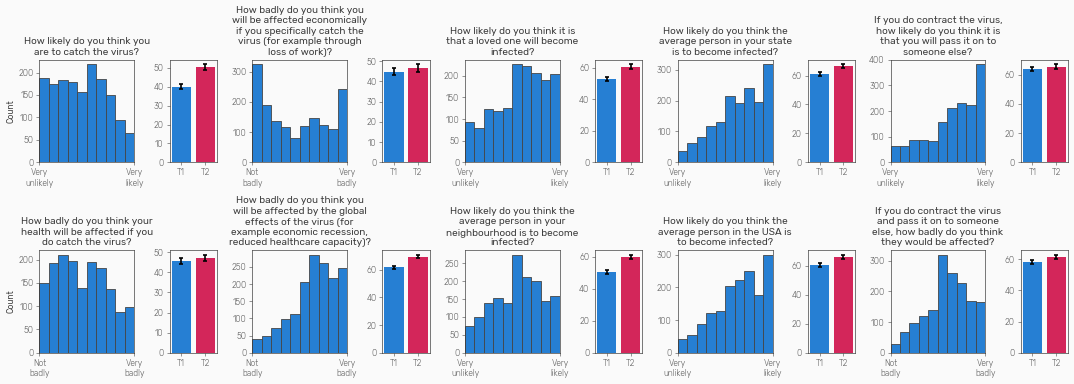

In [176]:
risk_perception_qs = risk_perception_df['prompt'].unique()

nrows = 2

width_ratios = np.ones(np.ceil(len(risk_perception_qs) / nrows).astype(int) * 2)
width_ratios[1::2] *= 0.5

f, ax = plt.subplots(nrows, np.ceil(len(risk_perception_qs) / nrows).astype(int) * 2, figsize=(18, 6.5), dpi=60, gridspec_kw={'width_ratios':width_ratios})

for n, q in enumerate(risk_perception_qs):
    n_responses = len(risk_perception_df[risk_perception_df['prompt'] == q]['response'])
    ax[n % nrows, int(n / nrows) * 2].hist(risk_perception_df[risk_perception_df['prompt'] == q]['response'], color='#267fd3', linewidth=1, edgecolor='#454545')
    ax[n % nrows, int(n / nrows) * 2].set_xlim(0, 100)
    ax[n % nrows, int(n / nrows) * 2].set_title('\n'.join(textwrap.wrap(q, 30, break_long_words=False)))
    ax[n % nrows, int(n / nrows) * 2].set_xticks([0, 100])
    if 'badly' in q:
        ax[n % nrows, int(n / nrows) * 2].set_xticklabels(['Not\nbadly', 'Very\nbadly'])
    else:
        ax[n % nrows, int(n / nrows) * 2].set_xticklabels(['Very\nunlikely', 'Very\nlikely'])
    
    if int(n / nrows) == 0:
        ax[n % nrows, int(n / nrows) * 2].set_ylabel('Count')
        
    # BAR
    ax[n % nrows, (int(n / nrows) * 2) + 1].bar([0, 1], group_df_follow_up[group_df_follow_up['prompt'] == q].groupby('phase')['response'].mean(), 
        yerr=group_df_follow_up[group_df_follow_up['prompt'] == q].groupby('phase')['response'].sem(), color=['#267fd3', '#d3265a'],
       error_kw=dict(lw=2, capsize=2, capthick=2))
    ax[n % nrows, (int(n / nrows) * 2) + 1].set_xticklabels(['', 'T1', 'T2'])
    
f.subplots_adjust(wspace=-1)
plt.tight_layout()

plt.savefig('../figures/risk_question_distributions2.png', dpi=200)
plt.savefig('../figures/risk_question_distributions2.svg')

### Descriptive stats

In [35]:
risk_perception_df.groupby('qid').describe()

response                                                    
       count       mean        std  min   25%   50%   75%    max
qid                                                             
1     1591.0  44.062225  26.617165  0.0  21.0  47.0  65.0  100.0
2     1591.0  44.700189  26.925403  0.0  22.0  43.0  65.0  100.0
3     1591.0  45.681961  34.346817  0.0  13.0  43.0  76.0  100.0
4     1591.0  64.383407  24.017212  0.0  50.0  67.0  82.0  100.0
5     1591.0  57.693903  27.018767  0.0  38.0  61.0  79.0  100.0
6     1591.0  54.741672  25.978739  0.0  35.0  56.0  75.0  100.0
7     1591.0  64.448146  25.934333  0.0  48.0  67.0  86.0  100.0
8     1591.0  63.778755  25.613481  0.0  48.0  67.0  84.0  100.0
9     1591.0  66.157134  27.385929  0.0  50.0  71.0  88.0  100.0
10    1591.0  59.416719  23.330585  0.0  47.5  60.0  76.0  100.0

## Protective behaviour

### Select data for behaviour questions

In [36]:
behaviour_df = group_df[group_df['q_category'] == 'Behaviour'][['qid', 'prompt', 'response', 'subjectID']]
behaviour_df['response'] = behaviour_df['response'].astype(float)

### Plot some histograms

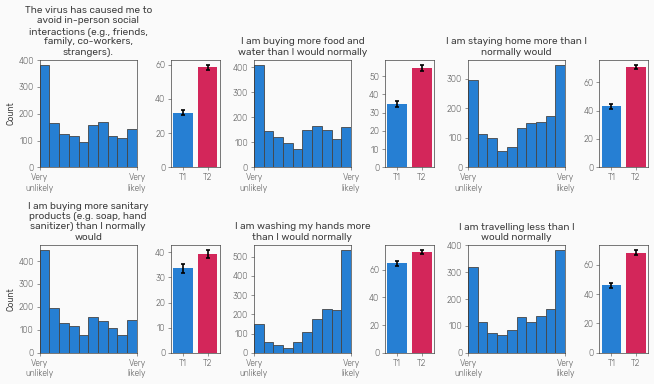

In [180]:
behaviour_qs = behaviour_df['prompt'].unique()[6:12]

nrows = 2

width_ratios = np.ones(np.ceil(len(behaviour_qs) / nrows).astype(int) * 2)
width_ratios[1::2] *= 0.5

f, ax = plt.subplots(nrows, np.ceil(len(behaviour_qs) / nrows).astype(int) * 2, figsize=(11, 6.5), dpi=60, gridspec_kw={'width_ratios':width_ratios})

for n, q in enumerate(behaviour_qs):
    n_responses = len(behaviour_df[behaviour_df['prompt'] == q]['response'])
    ax[n % nrows, int(n / nrows) * 2].hist(behaviour_df[behaviour_df['prompt'] == q]['response'], color='#267fd3', linewidth=1, edgecolor='#454545')
    ax[n % nrows, int(n / nrows) * 2].set_xlim(0, 100)
    ax[n % nrows, int(n / nrows) * 2].set_title('\n'.join(textwrap.wrap(q, 30, break_long_words=False)))
    ax[n % nrows, int(n / nrows) * 2].set_xticks([0, 100])
    if 'badly' in q:
        ax[n % nrows, int(n / nrows) * 2].set_xticklabels(['Not\nbadly', 'Very\nbadly'])
    else:
        ax[n % nrows, int(n / nrows) * 2].set_xticklabels(['Very\nunlikely', 'Very\nlikely'])
    
    if int(n / nrows) == 0:
        ax[n % nrows, int(n / nrows) * 2].set_ylabel('Count')
        
    # BAR
    ax[n % nrows, (int(n / nrows) * 2) + 1].bar([0, 1], group_df_follow_up[group_df_follow_up['prompt'] == q].groupby('phase')['response'].mean(), 
        yerr=group_df_follow_up[group_df_follow_up['prompt'] == q].groupby('phase')['response'].sem(), color=['#267fd3', '#d3265a'],
       error_kw=dict(lw=2, capsize=2, capthick=2))
    ax[n % nrows, (int(n / nrows) * 2) + 1].set_xticklabels(['', 'T1', 'T2'])
    
f.subplots_adjust(wspace=-1)
plt.tight_layout()

plt.savefig('../figures/behaviour_question_distributions.png', dpi=200)
plt.savefig('../figures/behaviour_question_distributions.svg')

### Descriptive stats

In [38]:
behaviour_df.groupby('qid').describe()

response                                                    
       count       mean        std  min   25%   50%   75%    max
qid                                                             
20    1591.0  46.686361  33.763406  0.0  14.0  50.0  76.0  100.0
21    1591.0  32.758014  33.577132  0.0   0.0  20.0  62.0  100.0
22    1591.0  24.538026  31.822419  0.0   0.0   6.0  47.5  100.0
23    1591.0  16.782527  28.366522  0.0   0.0   0.0  20.5  100.0
24    1591.0  13.354494  26.531387  0.0   0.0   0.0   9.0  100.0
25    1591.0  22.733501  24.716824  0.0   1.0  15.0  35.0  100.0
26    1591.0  41.677561  32.334354  0.0  10.0  40.0  68.0  100.0
27    1591.0  37.961031  32.710601  0.0   6.0  32.0  65.0  100.0
28    1591.0  42.501571  33.573216  0.0   9.0  42.0  71.0  100.0
29    1591.0  69.438089  30.661918  0.0  57.0  77.0  95.0  100.0
30    1591.0  54.253928  35.723391  0.0  18.0  62.0  87.0  100.0
31    1591.0  54.093652  36.495757  0.0  16.0  60.0  88.0  100.0

In [39]:
behaviour_df.groupby('qid').median()

,response
qid,
20,50.0
21,20.0
22,6.0
23,0.0
24,0.0
25,15.0
26,40.0
27,32.0
28,42.0


### Medians and IQRs

In [40]:
behaviour_df.groupby('qid').quantile(0.75) - behaviour_df.groupby('qid').quantile(0.25)

0.75,response
qid,
20,62.0
21,62.0
22,47.5
23,20.5
24,9.0
25,34.0
26,58.0
27,59.0
28,62.0
